In [2]:
from numpy import genfromtxt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.signal import butter, lfilter, freqz
from scipy.fft import fft, fftfreq, ifft
from scipy.interpolate import interp1d 
import math

In [3]:

dataPath = 'AbnormalData/RX29/'
# dataPath = 'Data/EKG_Sort/N1_'
columns = ['Timestamp', 'ch1', 'ch2', 'ch3', 'ch4']
PICO_CHANNELS_ORDER = ['FC3', 'FCz', 'Pz', 'Oz']

pre_data = pd.read_csv("%s%s"%(dataPath, 'VR_1_PreTest_EGG.csv'), header = None, names=columns)
# pre_ekg_data = pre_data[:,1]
post_data = pd.read_csv("%s%s"%(dataPath, 'VR_1_PostTest_EGG.csv'), header = None, names=columns)
# post_ekg_data = post_data[:,1]


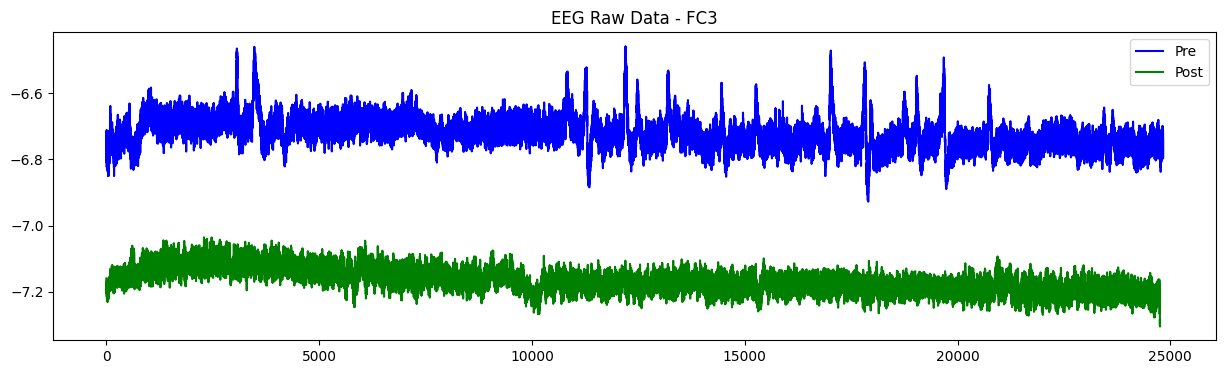

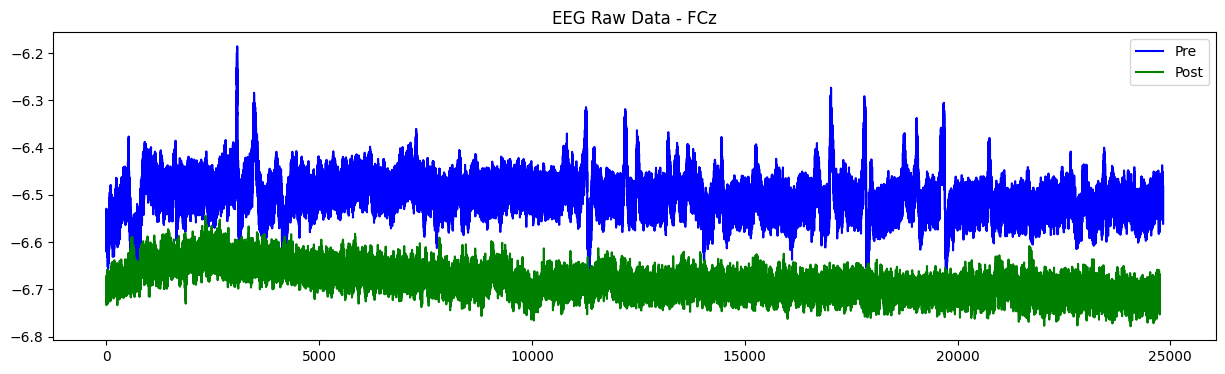

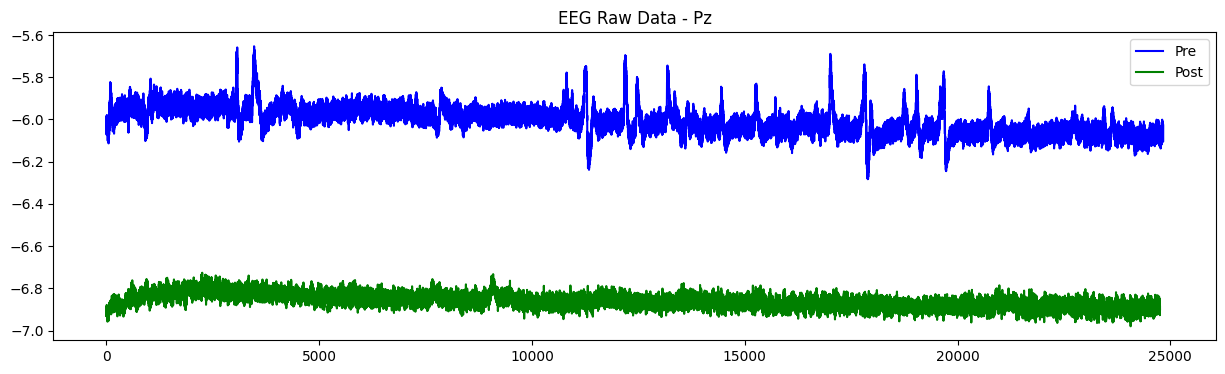

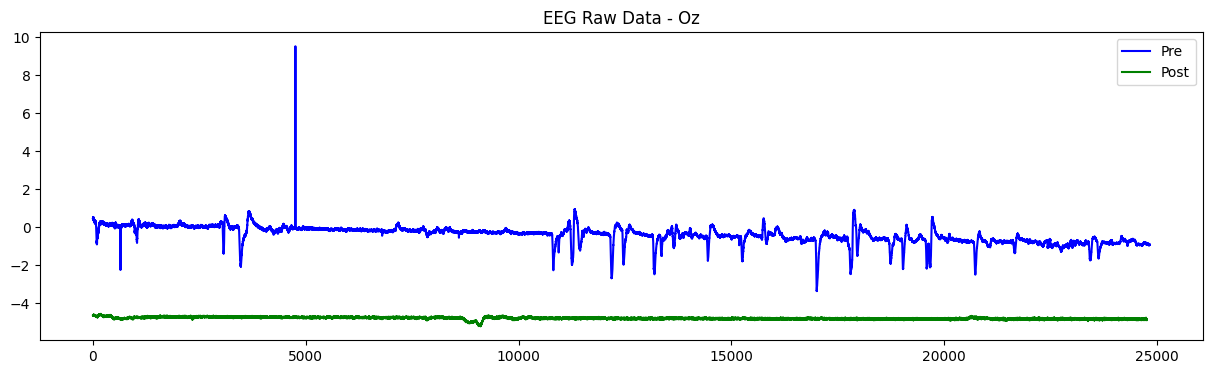

In [77]:
#Plot
for i in range(1,5):

    plt.figure(figsize=(15,4))
    plt.title("EEG Raw Data - " + PICO_CHANNELS_ORDER[i-1])
    # plt.xlim(0,25000) # 筆數
    # plt.ylim(0, 50) # 大小
    plt.plot(pre_data.index, pre_data['ch' + str(i)], color='blue')
    plt.plot(post_data.index, post_data['ch' + str(i)], color='green')
    plt.legend(['Pre','Post'])
    # plt.xlabel("Time")

    plt.show()

In [117]:
eeg_data = pd.read_csv("Feature/EEG.csv", header=0, index_col=0)
FeatureColumns = [
    'FC3_delta', 'FC3_theta', 'FC3_alpha', 'FC3_beta', 'FC3_gamma', 
    'FCz_delta', 'FCz_theta', 'FCz_alpha', 'FCz_beta', 'FCz_gamma', 
    'Pz_delta', 'Pz_theta', 'Pz_alpha', 'Pz_beta', 'Pz_gamma', 
    'Oz_delta', 'Oz_theta', 'Oz_alpha', 'Oz_beta', 'Oz_gamma'
]

eeg_mean = pd.DataFrame()
pre_eeg_data = eeg_data[eeg_data.stateLabel == 0]
post_eeg_data = eeg_data[eeg_data.stateLabel == 2]
preA_eeg_data = eeg_data[(eeg_data.stateLabel == 0) & (eeg_data.addictLabel == 1)]
postA_eeg_data = eeg_data[(eeg_data.stateLabel == 2) & (eeg_data.addictLabel == 1)]
preN_eeg_data = eeg_data[(eeg_data.stateLabel == 0) & (eeg_data.addictLabel == 0)]
postN_eeg_data = eeg_data[(eeg_data.stateLabel == 2) & (eeg_data.addictLabel == 0)]

print("Pre AVG")
eeg_mean = pd.concat([eeg_mean, pre_eeg_data[FeatureColumns].mean().round(6).to_frame().T], axis=0, ignore_index=True)
eeg_mean.insert(0, 'data_name', 'L_Pre_AVG')

eeg_mean = pd.concat([eeg_mean, preA_eeg_data[FeatureColumns].mean().round(6).to_frame().T], axis=0, ignore_index=True)
eeg_mean.at[1, 'data_name'] = 'A_Pre_AVG'

eeg_mean = pd.concat([eeg_mean, preN_eeg_data[FeatureColumns].mean().round(6).to_frame().T], axis=0, ignore_index=True)
eeg_mean.at[2, 'data_name'] = 'N_Pre_AVG'

print("Post AVG")
eeg_mean = pd.concat([eeg_mean, post_eeg_data[FeatureColumns].mean().round(6).to_frame().T], axis=0, ignore_index=True)
eeg_mean.at[3, 'data_name'] = 'L_Post_AVG'

eeg_mean = pd.concat([eeg_mean, postA_eeg_data[FeatureColumns].mean().round(6).to_frame().T], axis=0, ignore_index=True)
eeg_mean.at[4, 'data_name'] = 'A_Post_AVG'

eeg_mean = pd.concat([eeg_mean, postN_eeg_data[FeatureColumns].mean().round(6).to_frame().T], axis=0, ignore_index=True)
eeg_mean.at[5, 'data_name'] = 'N_Post_AVG'

eeg_mean.to_excel('Feature/EEG_mean.xlsx', index=False)
eeg_mean

Pre AVG
Post AVG


,data_name,FC3_delta,FC3_theta,FC3_alpha,FC3_beta,FC3_gamma,FCz_delta,FCz_theta,FCz_alpha,FCz_beta,...,Pz_delta,Pz_theta,Pz_alpha,Pz_beta,Pz_gamma,Oz_delta,Oz_theta,Oz_alpha,Oz_beta,Oz_gamma
0,L_Pre_AVG,0.599899,0.129577,0.090130,0.165034,0.010811,0.530160,0.151002,0.091966,0.208527,...,0.517625,0.146623,0.095540,0.223665,0.013399,0.570221,0.121753,0.076269,0.209746,0.018608
1,A_Pre_AVG,0.611523,0.131386,0.111207,0.132087,0.009258,0.565499,0.155780,0.095728,0.166319,...,0.574365,0.160778,0.109635,0.141355,0.009345,0.671573,0.109996,0.064964,0.134413,0.017919
2,N_Pre_AVG,0.589727,0.127994,0.071687,0.193863,0.012171,0.499238,0.146821,0.088673,0.245460,...,0.467978,0.134238,0.083208,0.295686,0.016946,0.481537,0.132040,0.086160,0.275663,0.019211
3,L_Post_AVG,0.497642,0.167164,0.125048,0.192046,0.012078,0.505552,0.180914,0.115406,0.177726,...,0.452586,0.184222,0.125602,0.219143,0.012958,0.480810,0.127640,0.112305,0.247118,0.023169
4,A_Post_AVG,0.498384,0.174482,0.161255,0.149589,0.008548,0.458323,0.200244,0.146502,0.175152,...,0.433410,0.201411,0.158145,0.190657,0.010849,0.476329,0.124877,0.168943,0.198577,0.021165
5,N_Post_AVG,0.496993,0.160761,0.093366,0.229195,0.015167,0.546878,0.164001,0.088197,0.179979,...,0.469364,0.169180,0.097128,0.244068,0.014804,0.484731,0.130058,0.062747,0.289591,0.024923


# 數據波型圖示

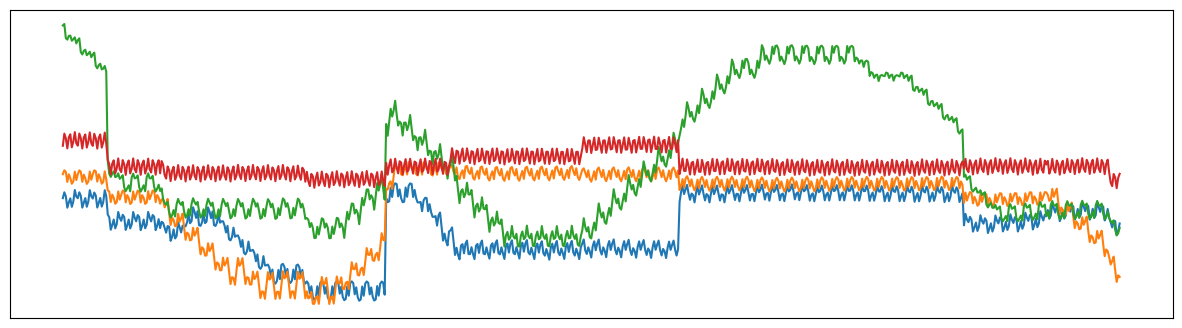

In [18]:
# EEG
plt.figure(figsize=(15,4))
# plt.title("EEG Raw Data - " + PICO_CHANNELS_ORDER[i-1])
# plt.xlim(0,25000) # 筆數
# plt.ylim(0, 50) # 大小
for i in range(1,5):
    plt.plot(pre_data.index[24:731], pre_data['ch' + str(i)][24:731])
# plt.plot(post_data.index, post_data['ch' + str(i)], color='green')
# plt.legend(['FC3', 'Fcz', 'Pz', 'Oz'])
# plt.xlabel("Time")
# 隐藏x轴和y轴的刻度标签
plt.xticks([])
plt.yticks([])
plt.show()

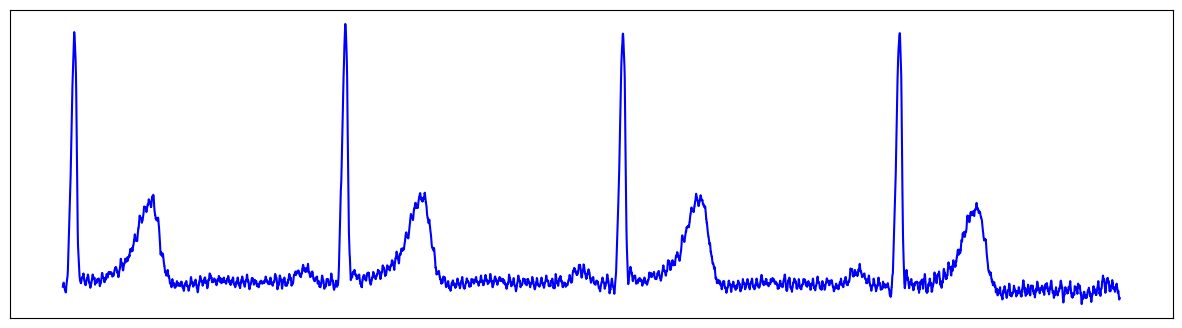

In [19]:
# EKG
#Plot
plt.figure(figsize=(15,4))
# plt.title("EKG Raw Data - " + "RX33")
pre_ekg_rawdata = pd.read_csv("AbnormalData/RX29/VR_1_PreTest_EKG.csv",  names=['TimeStamp', 'EKGdata'])
# post_ekg_rawdata = pd.read_csv("AbnormalData/RX29/VR_1_PostTest_EKG.csv",  names=['TimeStamp', 'EKGdata'])
# plt.xlim(0,25000) # 筆數
# plt.ylim(0, 50) # 大小
plt.plot(pre_ekg_rawdata.index[347:8065], pre_ekg_rawdata['EKGdata'][347:8065], color='blue')
# plt.plot(post_ekg_rawdata.index, post_ekg_rawdata['EKGdata'], color='green')
# plt.legend(['Pre','Post'])
# plt.xlabel("Time")
# 隐藏x轴和y轴的刻度标签
plt.xticks([])
plt.yticks([])
plt.show()

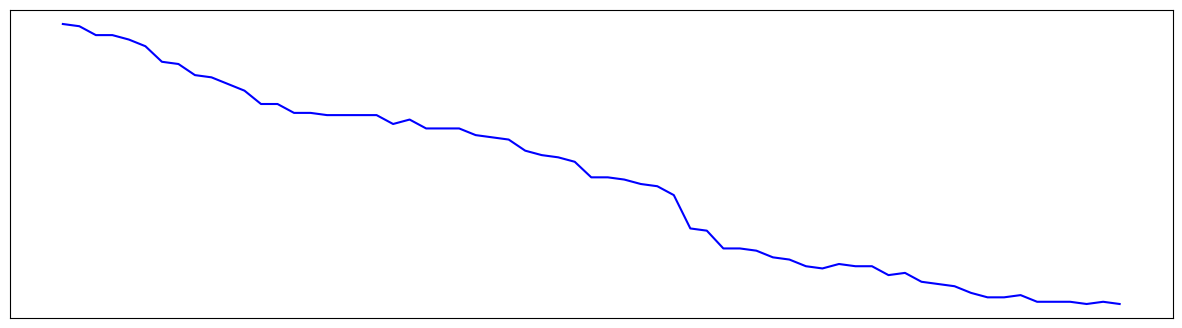

In [20]:
# RES
plt.figure(figsize=(15,4))
pre_ekg_rawdata = pd.read_csv("AbnormalData/RX29/VR_1_PreTest_RES.csv",  names=['TimeStamp', 'EKGdata'])
plt.plot(pre_ekg_rawdata.index[4:69], pre_ekg_rawdata['EKGdata'][4:69], color='blue')
# 隐藏x轴和y轴的刻度标签
plt.xticks([])
plt.yticks([])
plt.show()

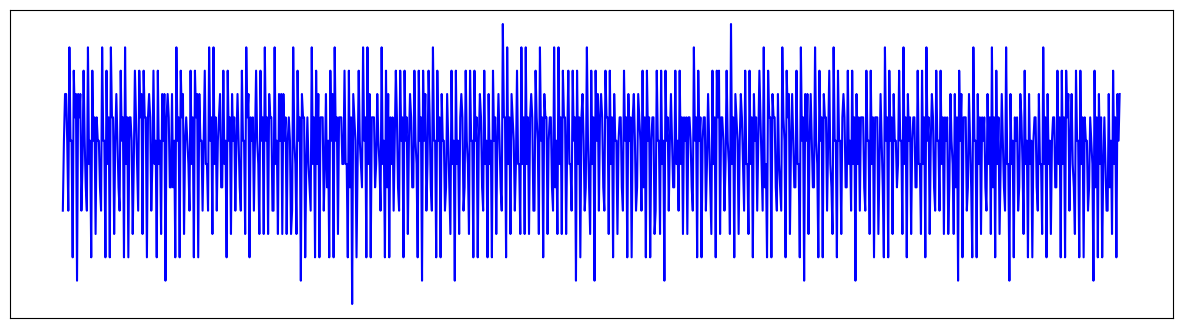

In [21]:
# GSR
plt.figure(figsize=(15,4))
pre_ekg_rawdata = pd.read_csv("AbnormalData/RX29/VR_1_PreTest_Skin.csv",  names=['TimeStamp', 'EKGdata'])
plt.plot(pre_ekg_rawdata.index[40:1009], pre_ekg_rawdata['EKGdata'][40:1009], color='blue')
# 隐藏x轴和y轴的刻度标签
plt.xticks([])
plt.yticks([])
plt.show()